<a href="https://www.kaggle.com/code/ayusharaj/salary-linear-regression?scriptVersionId=106839425" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [41]:
import pandas as pd 
pd.set_option('display.max_column',None) 
import warnings 
warnings.filterwarnings('ignore') 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy
from scipy import stats 
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
from scipy.stats import chi2, chi2_contingency
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [42]:
data = pd.read_csv("../input/salary-data-simple-linear-regression/Salary_Data.csv")

In [43]:
print ("The shape of the data is (row, column):"+ str(data.shape))

The shape of the data is (row, column):(30, 2)


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


**Checking for the null values**

In [46]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Heat map forthe given data

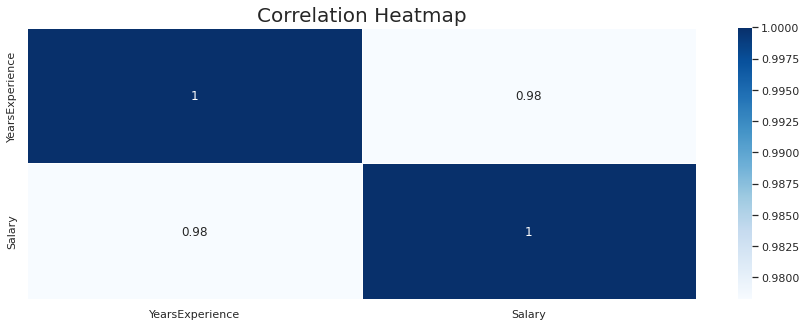

In [47]:
sns.heatmap(data.corr(), cmap="Blues", annot=True, linewidths=.5)
sns.set(rc={'figure.figsize':(15,5)})
plt.title("Correlation Heatmap", fontsize = 20);

**LOGISTIC REGRESSION**

In [48]:
X= data
y = data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)

In [50]:
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [51]:
model_1 = smf.ols(formula = 'Salary ~ YearsExperience', data=data).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           1.14e-20
Time:                        18:11:32   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     